<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #10: Nube de palabras
`Fecha de entrega: Mayo 13, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [4]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [5]:
#Lectura de archivo
documento=pd.read_csv("C:/CarlosH/Personal/Esp_Analitica/Electiva_NLP/bob_esponja.csv")             
documento.head()

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...


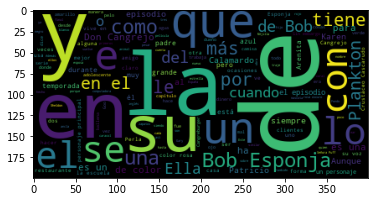

In [7]:
#Creación de Nube de palabras
palabras = documento.Descripción.str.cat(sep=" ")# concatena todas las cadenas en un solo string
wordcloud = WordCloud().generate(palabras)
plt.imshow(wordcloud)
plt.show()


In [9]:
#Limpieza de palabras vacias
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

documento['preprocesado'] = documento.Descripción.apply(lambda texto: pre_procesado(texto))
documento.head()


,Personaje,Descripción,preprocesado
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponja esponja mar forma rectangular colo...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrella mar color rosa mejor amigo bob esponj...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamardo tentáculos personaje principal bob e...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenita mejillas sandy cheeks inglés personaje...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugenio h cangrejo normalmente llamado señ...


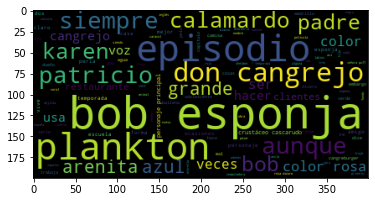

In [10]:
#Nube de palabras sin palabras vacias en el texto
palabras = documento.preprocesado.str.cat(sep=" ")# concatena todas las cadenas en un solo string
wordcloud = WordCloud().generate(palabras)
plt.imshow(wordcloud)
plt.show()


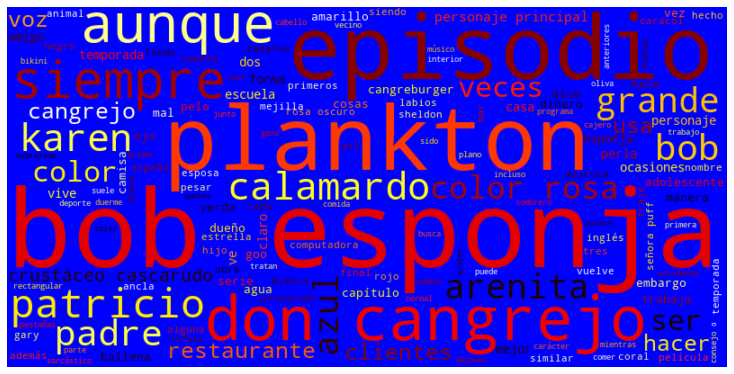

In [34]:
#Mejora de la apariencia de la Nube de palabras
palabras = documento.preprocesado.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=150,
                      background_color="blue", colormap="hot",
                      stopwords=stopwords, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()